# PlotWaveforms.ipynb

### Produce a simple plot of NR beyond-GR waveforms

Maria Okounkova (mokounkova@flatironinstitute.org)

In [5]:
import matplotlib.pyplot as plt
import h5py
from astropy import constants as const
import seaborn as sns
import numpy as np
from math import pi
import matplotlib
from scipy.interpolate import InterpolatedUnivariateSpline
from ipynb.fs.full.Auxiliary import swsh, ReadExtrapolatedModes, EllinKm

matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
matplotlib.rcParams['axes.labelsize'] = 24
matplotlib.rcParams['xtick.labelsize'] = 30
matplotlib.rcParams['ytick.labelsize'] = 30
matplotlib.rcParams['xtick.major.size'] = 20
matplotlib.rcParams['ytick.major.size'] = 20
matplotlib.rcParams['xtick.top'] = True
matplotlib.rcParams['xtick.direction'] = 'in'
matplotlib.rcParams['xtick.minor.visible'] = True
matplotlib.rcParams['xtick.minor.size'] = 10
matplotlib.rcParams['ytick.minor.size'] = 10
matplotlib.rcParams['legend.fontsize'] = 18
matplotlib.rcParams['legend.frameon'] = True
matplotlib.rcParams['lines.linewidth'] = 3

### Plot the beyond-GR waveforms 

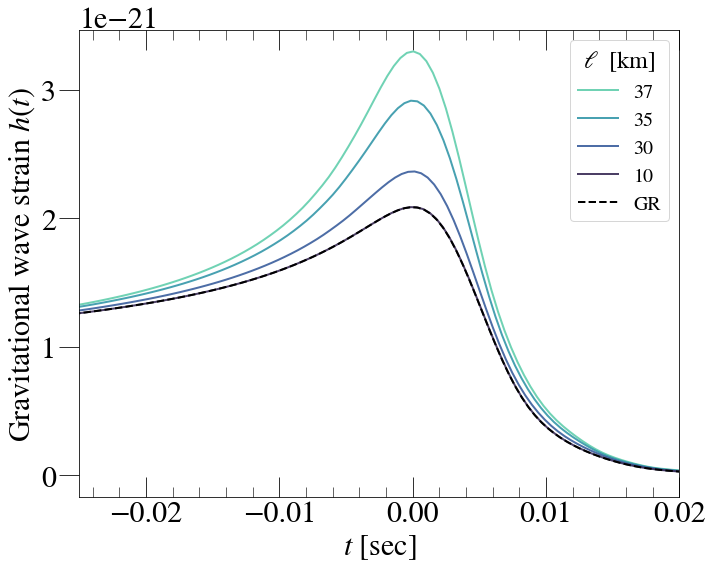

In [8]:
plt.figure(figsize=(10, 8))

params_dict = {'dist_mpc' : 400.0, 'mass' : 68.0, 'theta' : pi, 'phi' : 0, 'dt' : 1.0/2048}

ell_arr = [0.37, 0.35, 0.3, 0.1]
cs = sns.color_palette('mako_r', n_colors=len(ell_arr))

## dCS strains
for ell, c in zip(ell_arr, cs):
    
    name = str(ell).replace('.', 'p')
    file = 'Waveforms/Lev5/dCS_Strain_' + name + '.h5'
    
    ## Get physical value for ell 
    phys_ell_km = EllinKm(name, params_dict['mass'])

    time, h_plus, h_cross, h_amp = ReadExtrapolatedModes(file, params_dict)
    plt.plot(time, h_amp, lw=2.0, label=int(phys_ell_km), color=c, alpha=0.9)

## GR strain
time, h_plus, h_cross, h_amp = ReadExtrapolatedModes('Waveforms/Lev2/BackgroundStrain.h5', params_dict)
plt.plot(time, h_amp, lw=2.0, ls='--', label='GR', color='black')
    
plt.xlim(-0.025, 0.02)

plt.xlabel('$t$ [sec]', fontsize=30)
plt.ylabel('Gravitational wave strain $h(t)$', fontsize=30)
legend = plt.legend(title='$\ell$  [km]', fontsize=20)
plt.setp(legend.get_title(),fontsize=24)
plt.tight_layout()
plt.savefig('dCSWaveforms.pdf')
plt.show()
